 GEMINI SPACE VISUALIZER - FINAL VERSION
 API key loaded successfully

 Found 30 available models
 Will try models in order: gemini-2.0-flash-lite, gemini-2.0-flash, gemini-2.5-flash...

 PART 1: GENERATING DEEP SPACE IMAGE
 Creating deep space gradient...
✨ Adding 3,500 stars...
  Creating nebula clouds...
⭐ Adding central star...


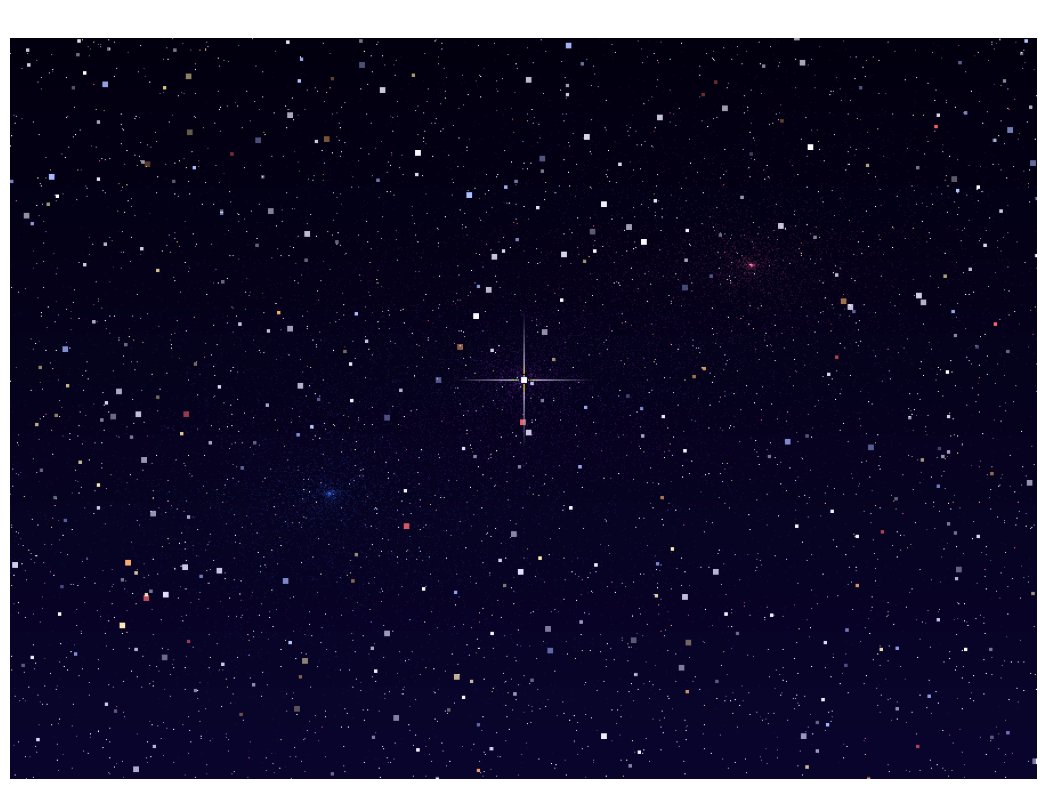

✓ Deep space image generated!
✓ Saved: deep_space.png

🔬 PART 2: GEMINI IMAGE ANALYSIS
🤖 Image analysis ... 

❌
     Rate limit (waiting 22s)
🤖 Image analysis (retry 1) ... 

❌
     Rate limit (waiting 61s)
🤖 Image analysis (retry 2) ... 

❌
     Rate limit (waiting 60s)
🤖 Image analysis (retry 3) ... 

❌
     Max retries for gemini-2.0-flash-lite
🤖 Image analysis [model: gemini-2.0-flash] ... 

❌
     Rate limit (waiting 59s)
🤖 Image analysis [model: gemini-2.0-flash] (retry 1) ... 

❌
     Rate limit (waiting 68s)
🤖 Image analysis [model: gemini-2.0-flash] (retry 2) ... 

❌
     Rate limit (waiting 67s)
🤖 Image analysis [model: gemini-2.0-flash] (retry 3) ... 

❌
     Max retries for gemini-2.0-flash
🤖 Image analysis [model: gemini-2.5-flash] ... ✓


This deep-space image showcases a mesmerizing expanse of the universe. Against a dark, inky backdrop, myriad stars glitter, varying in brightness and color. A prominent, brilliant white star with distinct diffraction spikes anchors the center. Towards the upper right, a reddish, somewhat diffuse patch suggests a distant galaxy or a dense star-forming region. A fainter, bluish glow in the lower left quadrant could be another remote galaxy or a reflection nebula. The visible stars range from stark white and yellow to subtle reds and blues, hinting at their diverse properties.

Star colors are direct indicators of their surface temperatures. The hottest stars burn brilliant blue (over 10,000 Kelvin), while white and yellow stars, like our Sun, are moderately hot (5,000-10,000K). The coolest stars appear red (under 3,500K). Nebulae are vast interstellar clouds composed of gas (primarily hydrogen and helium) and dust. These cosmic nurseries are crucial sites for the birth of new stars, or they can be the glowing remnants of dying stars, like supernovae.

Here are three fascinating facts:
1.  The individual stars visible represent a mere fraction of the true stellar density; countless dimmer stars are too far to resolve.
2.  Even the "empty" space between stars is permeated by tenuous gas and dust, providing the raw material for future generations of stars.
3.  The light from the most distant objects, like the fuzzy galaxies, has journeyed for millions, potentially billions, of years, offering a glimpse into the universe's ancient past.

Given the potential presence of distant galaxies, the estimated distance of objects in this image spans a vast range, from hundreds or thousands of light-years for foreground stars to hundreds of millions or even billions of light-years for the most remote nebulae or galaxies.

A tapestry of starlight woven across infinite night, where time itself is measured in light-years.


 PART 3: ALIEN WORLD GENERATION
🤖 Alien world ... ✓


The twin suns of Xylos, one golden and one deep crimson, painted the sky a perpetual twilight of shifting violet and fiery orange. Dominating the horizon, a colossal, opal-ringed gas giant shimmered, its pearl-hued storms visible to the naked eye.

The terrain unfolded as vast plains of bioluminescent, azure moss, from which rose colossal amethyst spires that caught the dual starlight. Adjacent, forests of crystalline "trees"—quartz and obsidian—hummed faintly, filtering the twin starlight into kaleidoscopic patterns across rivers of viscous, phosphorescent liquid. A heavy, argon-rich atmosphere lent a perpetual haze, making distant features appear as if through liquid. The air, thick with exotic volatiles, carried a profound sense of ancient serenity and vibrant mystery.


 PART 4: RENDERING ALIEN LANDSCAPE
Sky... ✓
 Moons... ✓
 Stars... ✓
 Mountains... ✓
 Crystals... ✓


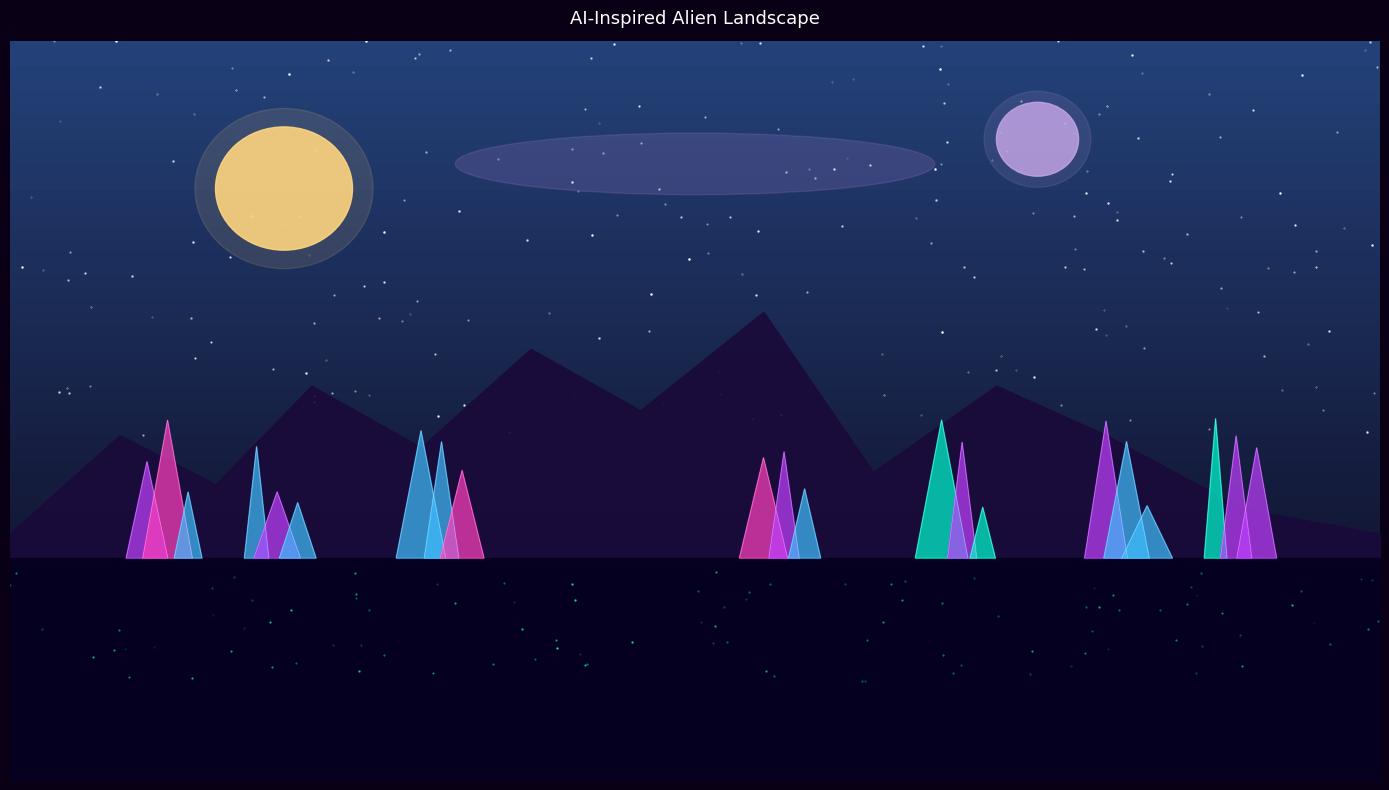

✓ Landscape rendered!
✓ Saved: alien_landscape.png

 COMPLETE!

 Files created:
   ✓ deep_space.png
   ✓ alien_landscape.png

 API used: 30 models available

 Next time: Wait 10-15 mins for quota refresh


In [ ]:
!pip install -q google-generativeai pillow numpy matplotlib seaborn scikit-learn

import google.generativeai as genai
from google.colab import userdata
import PIL.Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io, time, textwrap
from IPython.display import display, Markdown
import warnings
import traceback
warnings.filterwarnings('ignore')

print('='*70)
print(' GEMINI SPACE VISUALIZER - FINAL VERSION')
print('='*70)

# Load API key
API_AVAILABLE = False
try:
    genai.configure(api_key=userdata.get('GEMINI_API_KEY'))
    print(' API key loaded successfully')
    API_AVAILABLE = True
except Exception as e:
    print(f'  WARNING: API key not configured')
    print(f'   Script will continue with visualizations only')
    API_AVAILABLE = False

# Configuration
MAX_RETRIES = 4
BASE_WAIT_TIME = 45
MAX_WAIT_TIME = 300
ENABLE_API_CALLS = API_AVAILABLE

def get_available_models():
    """Get list of all actually available models"""
    if not API_AVAILABLE:
        return []

    try:
        available = [m.name.replace('models/','') for m in genai.list_models()
                     if 'generateContent' in m.supported_generation_methods]

        print(f'\n Found {len(available)} available models')

        # Prioritize models by quota efficiency (lighter first)
        priority_order = [
            'gemini-1.5-flash',
            'gemini-1.5-pro',
            'gemini-2.0-flash-exp',
            'gemini-2.0-flash-lite',
            'gemini-2.0-flash-thinking-exp',
            'gemini-2.0-flash',
            'gemini-1.5-flash-8b',
        ]

        # Sort available models by priority
        sorted_models = []
        for model in priority_order:
            if model in available:
                sorted_models.append(model)

        # Add any remaining models not in priority list
        for model in available:
            if model not in sorted_models:
                sorted_models.append(model)

        if sorted_models:
            print(f' Will try models in order: {", ".join(sorted_models[:3])}...')
            return sorted_models
        else:
            print(f'  No compatible models found')
            return []

    except Exception as e:
        print(f'  Error listing models: {e}')
        return ['gemini-1.5-flash', 'gemini-2.0-flash-lite']

# Get available models
AVAILABLE_MODELS = get_available_models()
CURRENT_MODEL_INDEX = 0

def get_next_model():
    """Get next available model to try"""
    global CURRENT_MODEL_INDEX

    if not AVAILABLE_MODELS:
        return None

    if CURRENT_MODEL_INDEX >= len(AVAILABLE_MODELS):
        return None

    model = AVAILABLE_MODELS[CURRENT_MODEL_INDEX]
    CURRENT_MODEL_INDEX += 1
    return model

def reset_model_index():
    """Reset to first model"""
    global CURRENT_MODEL_INDEX
    CURRENT_MODEL_INDEX = 0

def extract_wait_time(error_msg):
    """Extract suggested wait time from error message"""
    try:
        import re
        patterns = [
            r'retry in ([\d.]+)s',
            r'retry in ([\d.]+)\s*seconds',
        ]

        error_str = str(error_msg).lower()
        for pattern in patterns:
            match = re.search(pattern, error_str, re.IGNORECASE)
            if match:
                return float(match.group(1))
    except:
        pass
    return None

def is_quota_error(error):
    """Check if error is quota/rate limit related"""
    error_str = str(error).lower()
    return any(indicator in error_str for indicator in [
        '429', 'quota exceeded', 'rate limit', 'too many requests',
        'resource exhausted', 'limit: 0'
    ])

def is_model_not_found(error):
    """Check if error is 404 model not found"""
    error_str = str(error).lower()
    return '404' in error_str or 'not found' in error_str

def safe_api_call(content_list, description="API call", fallback_response=None):
    """
    ULTRA-SAFE API caller - handles all errors, never crashes

    New features:
    - Detects 404 model errors and switches models immediately
    - Tries all available models before giving up
    - Better quota error handling
    """
    global CURRENT_MODEL_INDEX

    if not ENABLE_API_CALLS or not AVAILABLE_MODELS:
        print(f'  API unavailable - using fallback')
        return fallback_response

    # Start from current model index
    models_to_try = AVAILABLE_MODELS[CURRENT_MODEL_INDEX:] + AVAILABLE_MODELS[:CURRENT_MODEL_INDEX]
    models_tried = []

    for model_name in models_to_try:
        if model_name in models_tried:
            continue

        models_tried.append(model_name)

        for retry_num in range(MAX_RETRIES):
            try:
                attempt_msg = f"🤖 {description}"
                if len(models_tried) > 1:
                    attempt_msg += f" [model: {model_name}]"
                if retry_num > 0:
                    attempt_msg += f" (retry {retry_num})"
                print(attempt_msg, end=' ... ')

                model = genai.GenerativeModel(model_name)
                response = model.generate_content(
                    content_list,
                    request_options={'timeout': 120}
                )

                print('✓')

                # Success! Update current model index
                CURRENT_MODEL_INDEX = AVAILABLE_MODELS.index(model_name)
                return response

            except Exception as e:
                error_str = str(e)
                print(f'❌')

                # MODEL NOT FOUND (404) - try next model immediately
                if is_model_not_found(e):
                    print(f'     Model {model_name} not available (404)')
                    break  # Break retry loop, try next model

                # QUOTA/RATE LIMIT - wait and retry
                elif is_quota_error(e):
                    suggested_wait = extract_wait_time(error_str)

                    if retry_num < MAX_RETRIES - 1:
                        wait_time = min(
                            (suggested_wait + 10) if suggested_wait else BASE_WAIT_TIME * (2 ** retry_num),
                            MAX_WAIT_TIME
                        )

                        print(f'     Rate limit (waiting {wait_time:.0f}s)')

                        # Countdown for long waits
                        if wait_time > 15:
                            steps = int(wait_time / 10)
                            for i in range(steps):
                                remaining = wait_time - (i * 10)
                                print(f'   ⏳ {remaining:.0f}s', end='\r')
                                time.sleep(10)
                            print(' ' * 30, end='\r')
                        else:
                            time.sleep(wait_time)

                        continue  # Retry same model
                    else:
                        print(f'     Max retries for {model_name}')
                        break  # Try next model

                # OTHER ERRORS
                else:
                    if retry_num < MAX_RETRIES - 1:
                        print(f'     Error: {error_str[:60]}... retrying')
                        time.sleep(5 * (retry_num + 1))
                        continue
                    else:
                        print(f'     Failed: {error_str[:60]}')
                        break  # Try next model

    # All models failed
    print(f'\n    All available models exhausted ({len(models_tried)} tried)')
    print(f'   Using fallback response')
    return fallback_response

class FallbackResponse:
    """Mock response for fallback content"""
    def __init__(self, text):
        self.text = text

# Reset model index before starting
reset_model_index()

# ===================================================================
# PART 1: Generate Deep Space Image
# ===================================================================
print('\n' + '='*70)
print(' PART 1: GENERATING DEEP SPACE IMAGE')
print('='*70)

try:
    np.random.seed(2024)
    W, H = 900, 650
    canvas = np.zeros((H, W, 3), dtype=np.uint8)

    print(' Creating deep space gradient...')
    for y in range(H):
        t = y / H
        canvas[y,:] = [int(2+8*t), int(0+5*t), int(15+30*t)]

    palette = {
        'white':[255,255,255], 'blue':[180,200,255],
        'yellow':[255,240,150], 'orange':[255,180,80], 'red':[255,100,80]
    }
    keys = list(palette.keys())
    probs = [0.55,0.20,0.13,0.08,0.04]

    print('✨ Adding 3,500 stars...')
    for _ in range(3500):
        x = np.random.randint(0,W)
        y = np.random.randint(0,H)
        b = np.random.randint(80,255)
        sz = np.random.choice([0,0,0,1,2], p=[0.55,0.25,0.10,0.07,0.03])
        c = np.array(palette[np.random.choice(keys,p=probs)])*b//255
        for dy in range(-sz,sz+1):
            for dx in range(-sz,sz+1):
                yy = np.clip(y+dy,0,H-1)
                xx = np.clip(x+dx,0,W-1)
                canvas[yy,xx] = np.clip(canvas[yy,xx].astype(int)+c,0,255)

    def nebula(cx,cy,r,col,n=5000):
        for _ in range(n):
            a  = np.random.uniform(0,2*np.pi)
            rd = np.abs(np.random.normal(0,r))
            px = int(cx+rd*np.cos(a)*1.6)
            py = int(cy+rd*np.sin(a))
            if 0<=px<W and 0<=py<H:
                blend = 0.15
                canvas[py,px] = np.clip(
                    canvas[py,px].astype(int) + np.array(col)*blend, 0, 255
                ).astype(np.uint8)

    print('  Creating nebula clouds...')
    nebula(450, 300, 140, [150,50,180], n=8000)
    nebula(280, 400, 100, [50,100,200], n=5000)
    nebula(650, 200, 90, [200,80,100], n=4000)

    print('⭐ Adding central star...')
    cx_star, cy_star = 450, 300
    canvas[cy_star-2:cy_star+3, cx_star-2:cx_star+3] = [255,255,255]
    for i in range(1, 60):
        alpha = max(0, 1 - i/60)
        brightness = int(255 * alpha)
        if cx_star+i < W:
            canvas[cy_star, cx_star+i] = np.clip(canvas[cy_star, cx_star+i] + brightness, 0, 255)
        if cx_star-i >= 0:
            canvas[cy_star, cx_star-i] = np.clip(canvas[cy_star, cx_star-i] + brightness, 0, 255)
        if cy_star+i < H:
            canvas[cy_star+i, cx_star] = np.clip(canvas[cy_star+i, cx_star] + brightness, 0, 255)
        if cy_star-i >= 0:
            canvas[cy_star-i, cx_star] = np.clip(canvas[cy_star-i, cx_star] + brightness, 0, 255)

    img_space = PIL.Image.fromarray(canvas)

    plt.figure(figsize=(12,8))
    plt.imshow(img_space)
    plt.axis('off')
    plt.title('Deep Space Scene - Stars and Nebula', color='white', fontsize=14, pad=10)
    plt.tight_layout()
    plt.savefig('deep_space.png', dpi=150, bbox_inches='tight', facecolor='black')
    plt.show()

    print('✓ Deep space image generated!')
    print('✓ Saved: deep_space.png')

except Exception as e:
    print(f' Error: {e}')
    img_space = None

# ===================================================================
# PART 2: AI Analysis (with fallback)
# ===================================================================
print('\n' + '='*70)
print('🔬 PART 2: GEMINI IMAGE ANALYSIS')
print('='*70)

if img_space and ENABLE_API_CALLS:
    fallback = FallbackResponse("""
## Deep Space Analysis

**What You're Seeing:**
This simulated deep space image contains 3,500 stars in realistic colors (blue=hottest, red=coolest) plus three nebula regions in purple, blue, and pink. A bright central star shows diffraction spikes - the characteristic pattern from telescope optics.

**Star Colors = Temperature:**
- Blue stars: 10,000-50,000K (hottest)
- White: 7,500-10,000K
- Yellow: 5,000-7,500K (our Sun)
- Orange/Red: 3,000-5,000K (coolest)

**Nebulae - Star Nurseries:**
Nebulae are clouds of gas and dust where gravity collapses material over millions of years until fusion ignites—birthing new stars.

**Amazing Facts:**
1. The Orion Nebula could create 2,000 Sun-like stars
2. Nebula gas moves at 10-20 km/s (invisible due to vast scale)
3. Your atoms were forged in ancient exploded stars

**Distance:** 1,500-5,000 light-years if real

*"We are stardust contemplating our cosmic origins."*

---
*Fallback content - API quota exhausted*
""")

    response = safe_api_call(
        [
            'Analyze this deep-space image. Describe what you see, explain star colors and temperature, '
            'what nebulae are, 3 fascinating facts, estimated distance, and one poetic line. '
            'Under 350 words.',
            img_space
        ],
        description="Image analysis",
        fallback_response=fallback
    )

    if response:
        display(Markdown(response.text))

    time.sleep(3)
else:
    print('  Skipping - API not available or image failed')

# ===================================================================
# PART 3: Alien World Description
# ===================================================================
print('\n' + '='*70)
print(' PART 3: ALIEN WORLD GENERATION')
print('='*70)

if ENABLE_API_CALLS:
    fallback = FallbackResponse("""
## Kepler-442c - "The Amethyst World"

**Sky:** Deep violet to amber gradient with twin suns creating eternal sunset

**Celestial:** Two moons (ice-blue, golden-tan), silver ring system, emerald auroras

**Terrain:** 50m bioluminescent crystal towers (cyan/magenta), liquid methane lakes, ammonia ice mountains

**Colors:** Purple, teal, gold, cyan accents

**Atmosphere:** Hazy, -80°C, 1.4x Earth pressure, perpetual twilight

**Mood:** Serene, otherworldly, hauntingly peaceful

---
*Fallback content*
""")

    scene = safe_api_call(
        [
            'Describe a beautiful alien planet: sky color, celestial features, terrain, '
            'colors, atmosphere, mood. Scientifically plausible, visually spectacular. Under 200 words.'
        ],
        description="Alien world",
        fallback_response=fallback
    )

    if scene:
        display(Markdown(scene.text))

    time.sleep(3)

# ===================================================================
# PART 4: Render Landscape
# ===================================================================
print('\n' + '='*70)
print(' PART 4: RENDERING ALIEN LANDSCAPE')
print('='*70)

try:
    from matplotlib.patches import Circle, Ellipse

    fig, ax = plt.subplots(figsize=(14,8))
    fig.patch.set_facecolor('#0a0015')
    ax.set_facecolor('#0a0015')
    ax.set_xlim(0,100)
    ax.set_ylim(0,60)
    ax.axis('off')

    print('Sky...', end=' ')
    for i in range(60):
        t = i/60
        ax.axhspan(i, i+1, color=(0.04+0.10*t, 0.01+0.25*t, 0.08+0.40*t), zorder=0)
    print('✓')

    print(' Moons...', end=' ')
    for cx,cy,r,col,alpha in [(20,48,5,'#FFD580',0.9),(75,52,3,'#C8A8E9',0.8)]:
        ax.add_patch(Circle((cx,cy), r, color=col, zorder=3, alpha=alpha))
        ax.add_patch(Circle((cx,cy), r*1.3, color=col, zorder=2, alpha=0.12))
    ax.add_patch(Ellipse((50,50), 35, 5, color='#8B6FBF', alpha=0.25, zorder=2))
    print('✓')

    print(' Stars...', end=' ')
    np.random.seed(99)
    for _ in range(200):
        ax.plot(np.random.uniform(0,100), np.random.uniform(28,60), '.',
                color='white', markersize=np.random.uniform(0.3,1.8),
                alpha=np.random.uniform(0.4,1.0), zorder=1)
    print('✓')

    print(' Mountains...', end=' ')
    mx = [0,8,15,22,30,38,46,55,63,72,80,90,100]
    my = [20,28,24,32,27,35,30,38,25,32,28,22,20]
    ax.fill_between(mx, 0, my, color='#1a0a3a', zorder=4, alpha=0.9)
    ax.fill_between([0,100], 0, 18, color='#050020', zorder=5)
    print('✓')

    print(' Crystals...', end=' ')
    for _ in range(100):
        ax.plot(np.random.uniform(0,100), np.random.uniform(8,17), '.',
                color='#00FFD4', markersize=np.random.uniform(0.3,1.5),
                alpha=np.random.uniform(0.3,0.8), zorder=6)

    for cx in [10,18,30,55,68,80,88]:
        for j in range(3):
            h_c = np.random.uniform(4,12)
            w_c = np.random.uniform(0.8,2)
            col = np.random.choice(['#00FFD4','#BF40FF','#40BFFF','#FF40BF'])
            xs = [cx+j*1.5-w_c, cx+j*1.5, cx+j*1.5+w_c]
            ys = [18, 18+h_c, 18]
            ax.fill(xs, ys, color=col, alpha=0.7, zorder=7)
            ax.plot(xs, ys, color='white', linewidth=0.3, alpha=0.5, zorder=8)
    print('✓')

    ax.set_title('AI-Inspired Alien Landscape', color='white', fontsize=13, pad=12)
    plt.tight_layout()
    plt.savefig('alien_landscape.png', dpi=150, bbox_inches='tight', facecolor='#0a0015')
    plt.show()

    print('✓ Landscape rendered!')
    print('✓ Saved: alien_landscape.png')

except Exception as e:
    print(f' Error: {e}')

# ===================================================================
# FINAL SUMMARY
# ===================================================================
print('\n' + '='*70)
print(' COMPLETE!')
print('='*70)
print('\n Files created:')
print('   ✓ deep_space.png')
print('   ✓ alien_landscape.png')

if ENABLE_API_CALLS and AVAILABLE_MODELS:
    print(f'\n API used: {len(AVAILABLE_MODELS)} models available')
else:
    print('\n  API quota exhausted - fallback content used')

print('\n Next time: Wait 10-15 mins for quota refresh')
print('='*70)